In [90]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [91]:
# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [92]:
num = 1000
X_moons, y_moons = make_moons(num, noise=0.1, random_state=42)

In [93]:
m,n = X_moons.shape
print(m,n)

1000 2


In [94]:
bias = np.ones([m,1])

In [104]:
data_X = np.c_[bias,X_moons]
data_Y = y_moons.reshape(-1,1)

In [105]:
#데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)

In [106]:
tf.reset_default_graph()

In [107]:
#계산 그래프 준비
import tensorflow as tf

X = tf.placeholder(tf.float32, shape = (None, n+1), name = "X")
y = tf.placeholder(tf.float32, shape = (None,1), name = "y")
theta = tf.Variable(tf.random_uniform([n+1,1], -1.0, 1.0, seed=42), name = "theta")
pred_y = tf.matmul(X,theta, name = 'pred_y')
sigmoid_y = tf.math.sigmoid(pred_y, name = 'sigmoid')

cost = tf.losses.log_loss(y, sigmoid_y)

In [108]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

In [109]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [110]:
init = tf.global_variables_initializer()

In [112]:
n_epochs = 1000
batch_size = 100
n_batches = int(np.ceil(1000 / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X : X_batch , y : y_batch})
        loss_val = cost.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("에포크:", epoch, "\tLoss:", loss_val)

    y_proba_val = sigmoid_y.eval(feed_dict={X: X_test, y: y_test})

에포크: 0 	Loss: 0.90276736
에포크: 100 	Loss: 0.4238001
에포크: 200 	Loss: 0.35721734
에포크: 300 	Loss: 0.32763994
에포크: 400 	Loss: 0.3095788
에포크: 500 	Loss: 0.29702845
에포크: 600 	Loss: 0.28804275
에포크: 700 	Loss: 0.28099746
에포크: 800 	Loss: 0.27571106
에포크: 900 	Loss: 0.27145973


In [122]:
y_pred = (y_proba_val >= 0.5)
y_pred[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [ True]])

In [124]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.86

In [125]:
recall_score(y_test, y_pred)

0.86

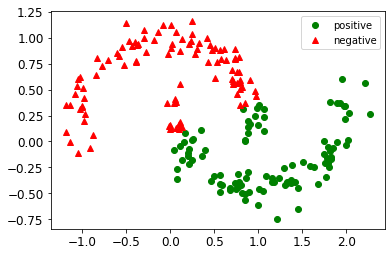

In [127]:
y_pred_idx = y_pred.reshape(-1) # 열 벡터를 1차원 배열로 바꿉니다
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="negative")
plt.legend()
plt.show()